In [12]:
"Project Proposal"

[1] "Project Proposal"

In [34]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 10)
#source("tests.R")
#source("cleanup.R")

#read in file
survival <- read_csv("dataset_1.csv", col_names = TRUE, col_types = NULL, skip_empty_rows = TRUE)%>%
mutate(hospital_death = as_factor(hospital_death))
survival
#how big is data set?
dim(survival)

Warning message:
“Missing column names filled in: 'X68' [68]”
Parsed with column specification:
cols(
  .default = col_double(),
  ethnicity = col_character(),
  gender = col_character(),
  icu_admit_source = col_character(),
  icu_stay_type = col_character(),
  icu_type = col_character(),
  apache_3j_bodysystem = col_character(),
  apache_2_bodysystem = col_character(),
  X68 = col_logical()
)

See spec(...) for full column specifications.



encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,⋯,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,X68,hospital_death
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<fct>
66154,25312,118,68,22.73,0,Caucasian,M,180.3,Floor,⋯,1,0,0,0,0,0,Sepsis,Cardiovascular,NA,0
114252,59342,81,77,27.42,0,Caucasian,F,160.0,Floor,⋯,1,0,0,0,0,0,Respiratory,Respiratory,NA,0
119783,50777,118,25,31.95,0,Caucasian,F,172.7,Accident & Emergency,⋯,0,0,0,0,0,0,Metabolic,Metabolic,NA,0
79267,46918,118,81,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,⋯,0,0,0,0,0,0,Cardiovascular,Cardiovascular,NA,0
92056,34377,33,19,NA,0,Caucasian,M,188.0,Accident & Emergency,⋯,0,0,0,0,0,0,Trauma,Trauma,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
25153,47787,199,71,25.34944,1,Caucasian,M,182.9,Operating Room / Recovery,⋯,0,0,0,0,0,1,Cardiovascular,Cardiovascular,NA,0
53423,58832,62,48,48.91121,1,Caucasian,M,190.5,Operating Room / Recovery,⋯,0,0,0,0,0,0,Cardiovascular,Cardiovascular,NA,0
92359,62784,62,71,38.09524,0,Caucasian,F,157.5,Accident & Emergency,⋯,0,0,0,0,0,0,Cardiovascular,Cardiovascular,NA,0


[1] 39999    69

Warning message:
“Removed 1928 rows containing non-finite values (stat_bin).”


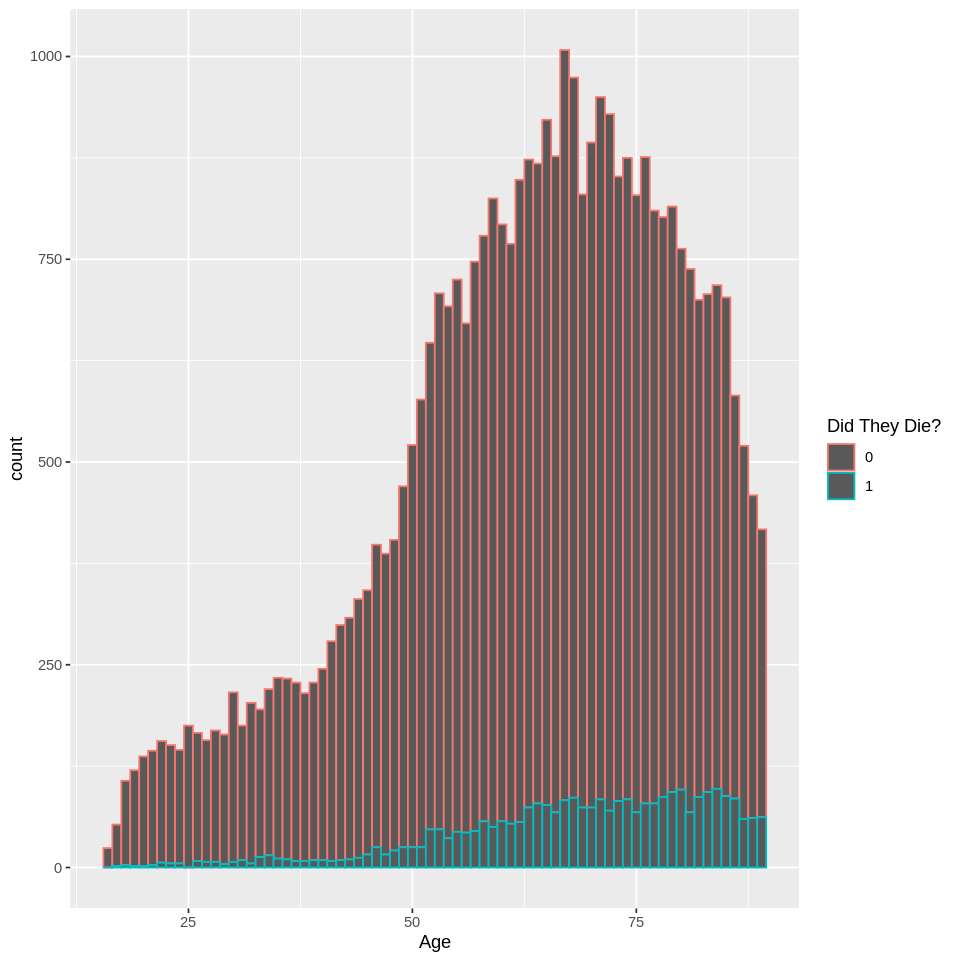

In [35]:
#begin to explore data
age_plot <- survival %>%
ggplot(aes(x=age, color=hospital_death, na.rm=TRUE))+
    geom_histogram(binwidth=1)+
    labs(x="Age", color="Did They Die?")
    options(repr.plot.height = 8, repr.plot.width = 8)
age_plot
#deaths increase with age but so do hospitalizations in general


Warning message:
“Removed 1299 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1088 rows containing non-finite values (stat_bin).”


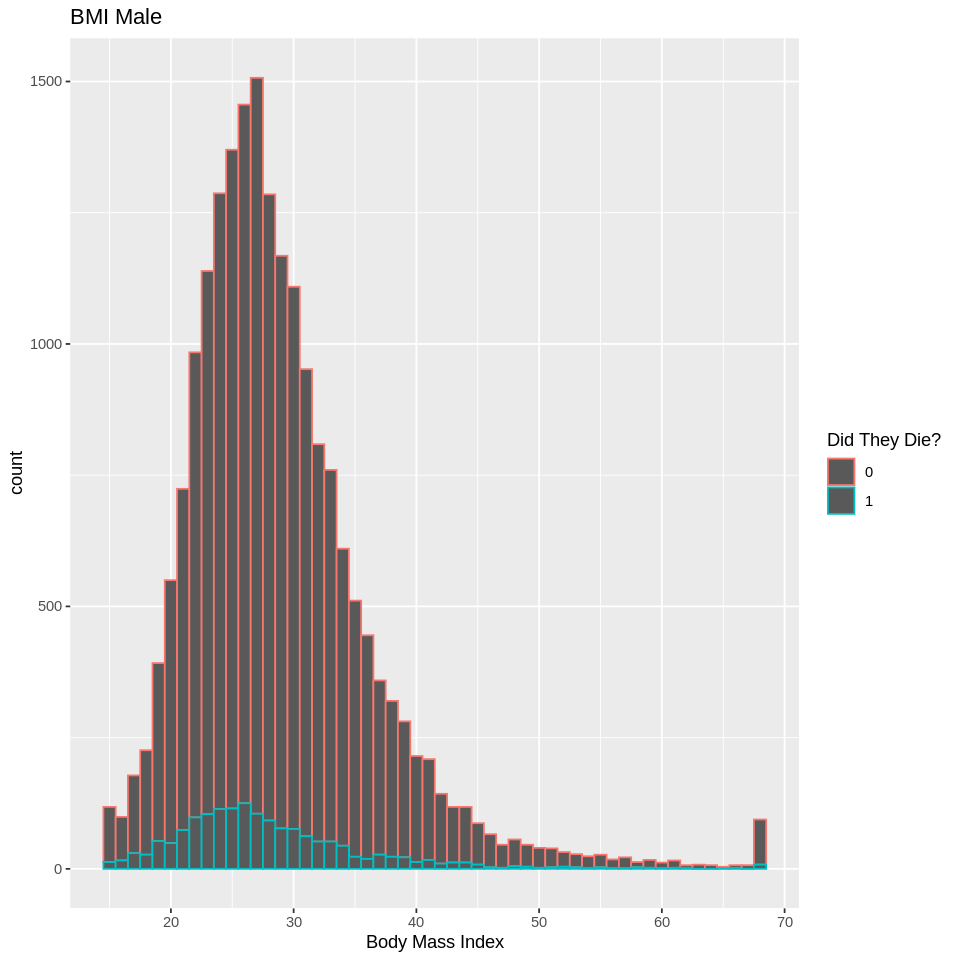

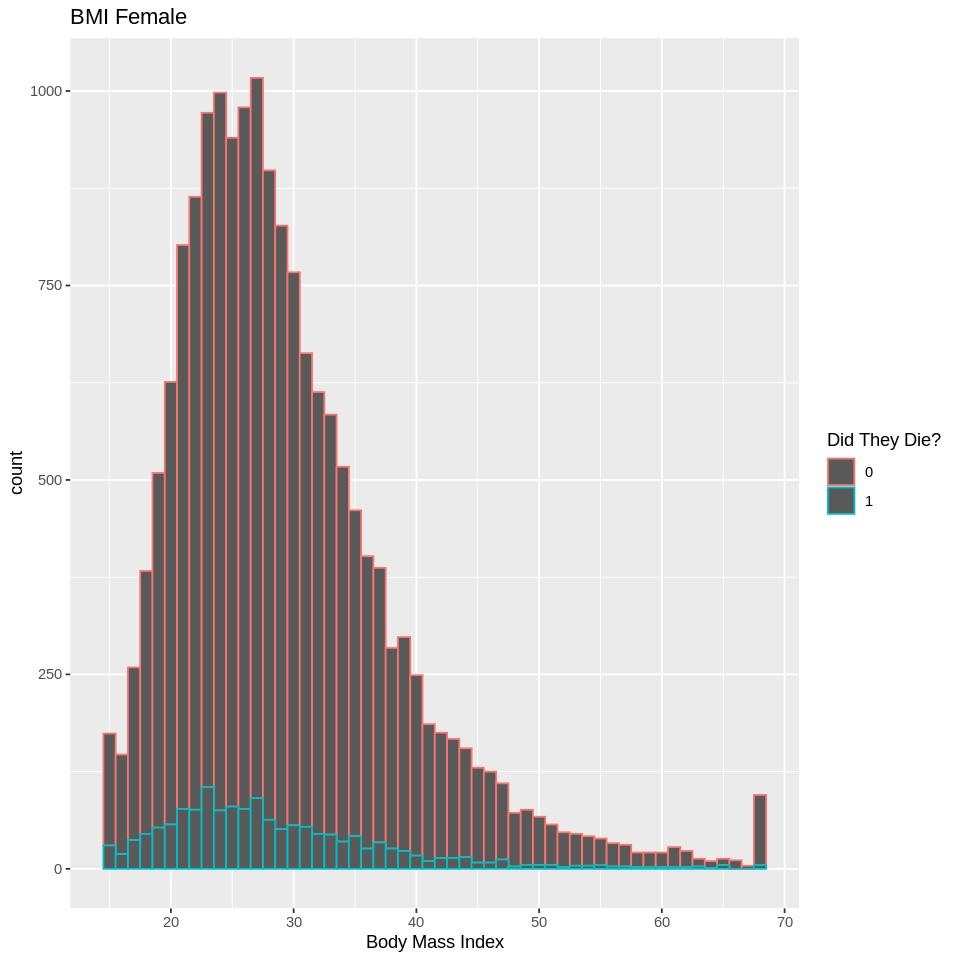

In [36]:
#new graph
bmi_plot_M<- survival %>%
filter(gender=="M")%>%
    ggplot(aes(x=bmi, color=hospital_death, na.rm=TRUE))+
        geom_histogram(binwidth=1)+
        labs(x="Body Mass Index", color="Did They Die?")+
        ggtitle("BMI Male")
        options(repr.plot.height = 8, repr.plot.width = 8)
    bmi_plot_M

bmi_plot_F <- survival %>%
filter(gender=="F")%>%
    ggplot(aes(x=bmi, color=hospital_death, na.rm=TRUE))+
        geom_histogram(binwidth=1)+
        labs(x="Body Mass Index", color="Did They Die?")+
        ggtitle("BMI Female")
        options(repr.plot.height = 8, repr.plot.width = 8)
    bmi_plot_F
#BMI 20-40 has most hospitalizations and deaths. 
#doesnt tell us much bc idk how much of population is which bmi
#Same for males and females

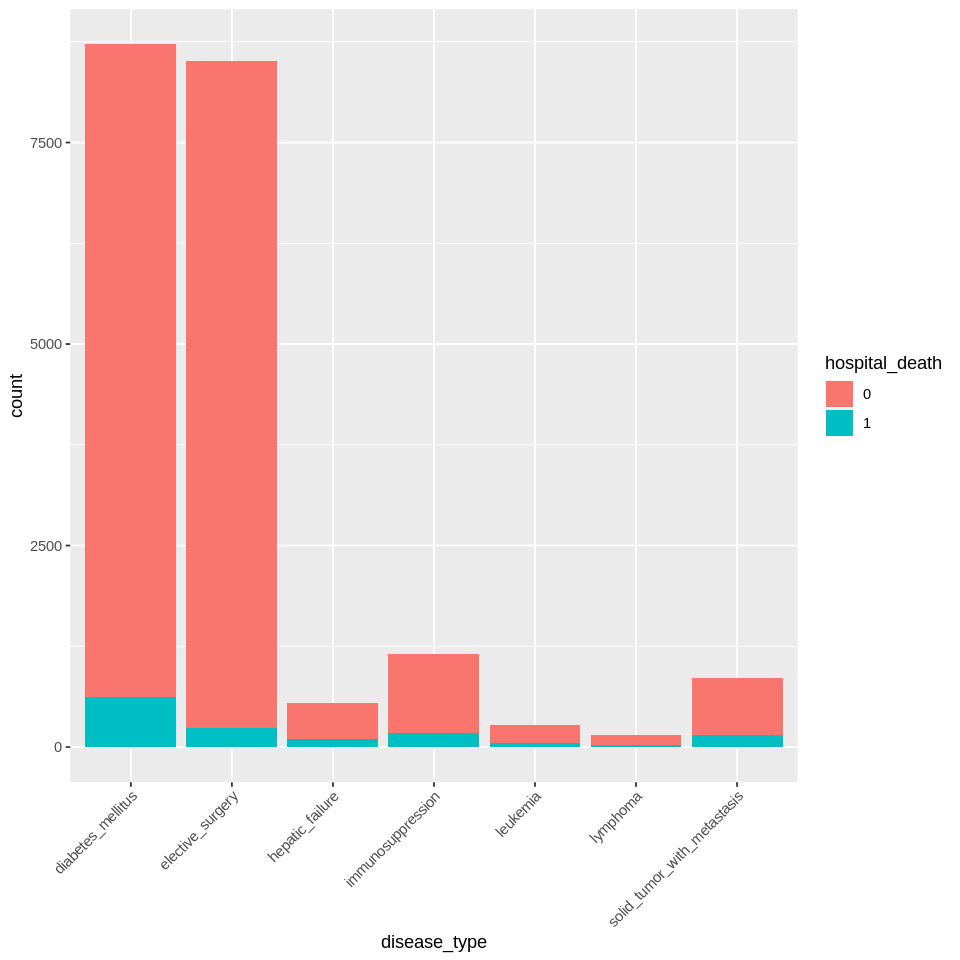

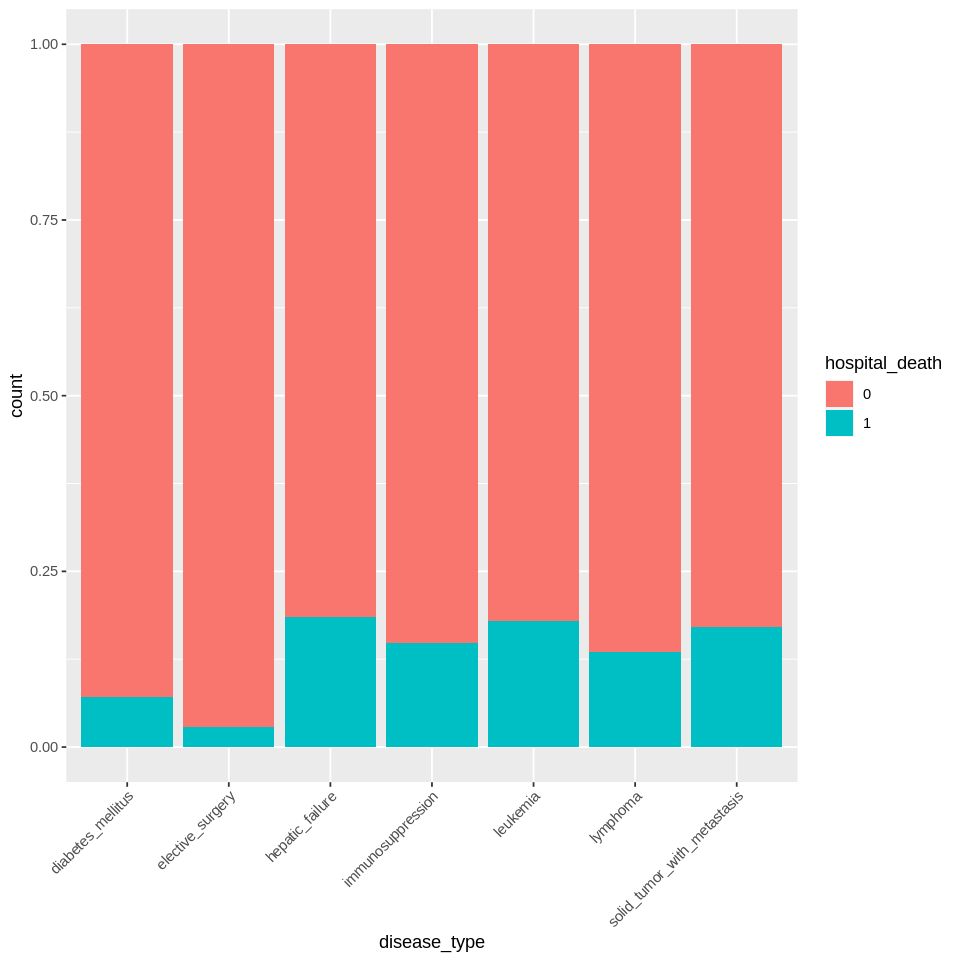

In [37]:
#tidy data - only people with one of the diseases
diseases_data <- survival %>%
select(elective_surgery, diabetes_mellitus:solid_tumor_with_metastasis, hospital_death)%>%
pivot_longer(cols=elective_surgery:solid_tumor_with_metastasis,
            names_to="disease_type",
            values_to="disease_presence")%>%
filter(disease_presence==1)



#bar graph diseases number of hospitalizations and deaths for each
disease_plot1 <- diseases_data %>%
ggplot(aes(x=disease_type, fill=hospital_death))+
    geom_bar()+
     theme(axis.text.x=element_text(angle=45, hjust=1))
disease_plot1

#% deaths
disease_plot2 <- diseases_data %>%
ggplot(aes(x=disease_type, fill=hospital_death))+
    geom_bar(position="fill")+
     theme(axis.text.x=element_text(angle=45, hjust=1))
disease_plot2

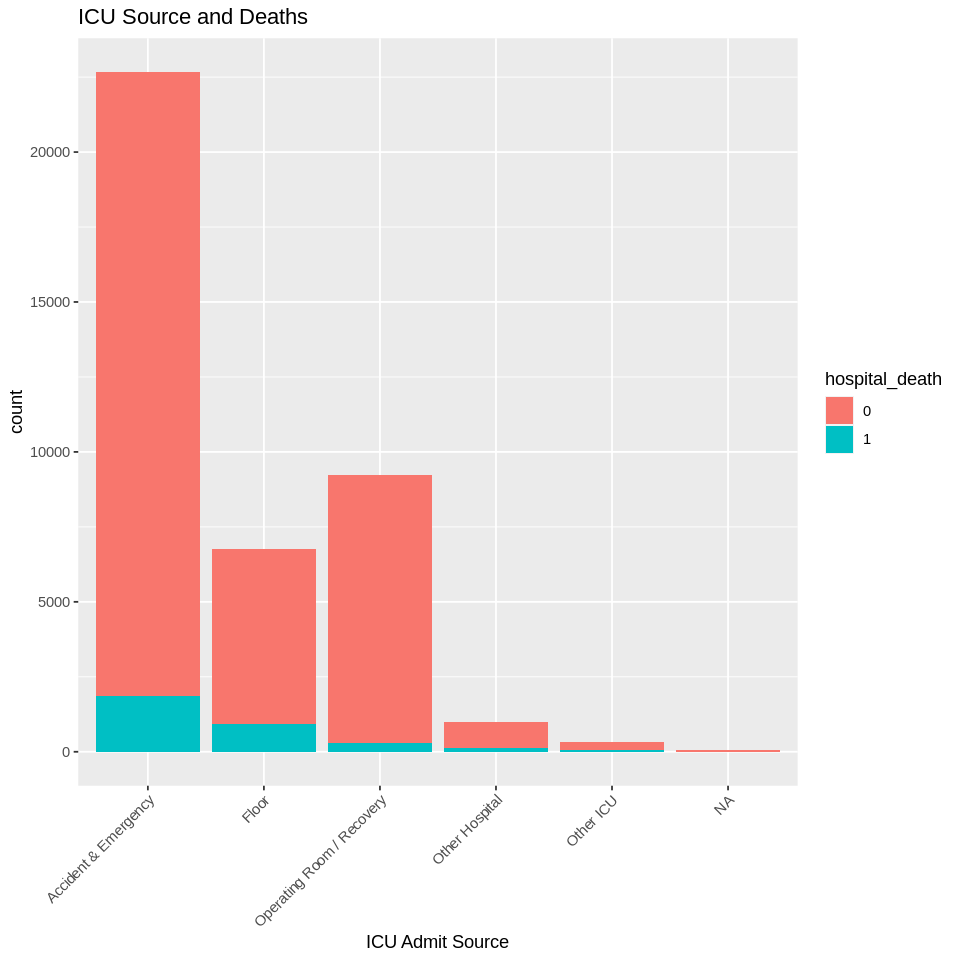

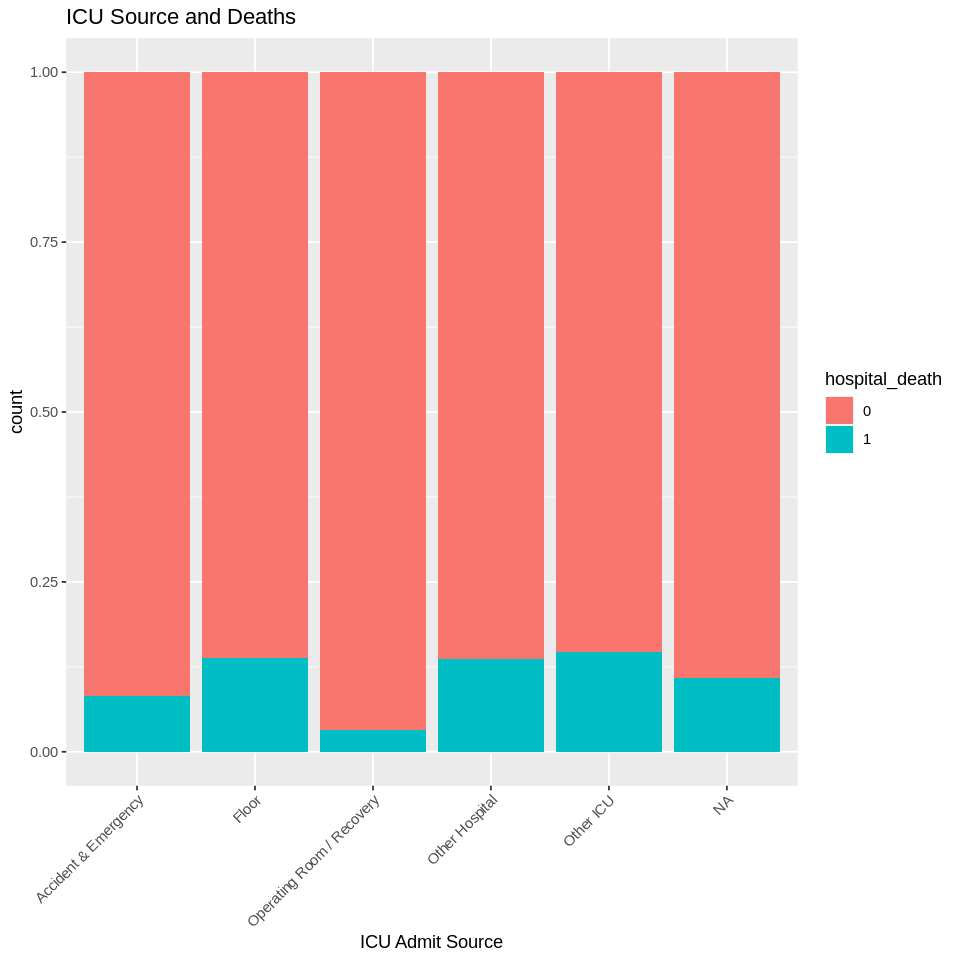

In [38]:
#icu_admit_source relationship to death
icu_source_graph1 <- survival%>%
 ggplot(aes(x=icu_admit_source, fill=hospital_death))+
    geom_bar()+
    labs(x="ICU Admit Source", color="Did They Die?")+
    ggtitle("ICU Source and Deaths")+
    theme(axis.text.x=element_text(angle=45, hjust=1))
icu_source_graph1

icu_source_graph2 <- survival%>%
 ggplot(aes(x=icu_admit_source, fill=hospital_death))+
    geom_bar(position="fill")+
    labs(x="ICU Admit Source", color="Did They Die?")+
    ggtitle("ICU Source and Deaths")+
    theme(axis.text.x=element_text(angle=45, hjust=1))
icu_source_graph2

#diff sources do have diff % survival, but not radically different